In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
url = "https://api.db.nomics.world/v22/series/AMECO/UDGG.csv?dimensions=%7B%22freq%22%3A%5B%22a%22%5D%2C%22unit%22%3A%5B%22percentage-of-gdp-at-current-prices-excessive-deficit-procedure%22%5D%2C%22geo%22%3A%5B%22deu%22%2C%22ita%22%2C%22fra%22%2C%22esp%22%5D%7D&limit=1000"

df_debt = pd.read_csv(url)

df_debt.to_csv('data/df_debt.csv', sep = ",", index = False)

In [28]:
df_debt

,period,Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Germany (AMECO/UDGG/DEU.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Spain (AMECO/UDGG/ESP.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – France (AMECO/UDGG/FRA.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Italy (AMECO/UDGG/ITA.1.0.319.0.UDGG)
0,1960,NaN,NaN,NaN,31.7953
1,1961,NaN,NaN,NaN,29.9336
2,1962,NaN,NaN,NaN,28.7905
3,1963,NaN,NaN,NaN,26.8476
4,1964,NaN,NaN,NaN,26.6785
...,...,...,...,...,...
61,2021,68.9861,116.8408,112.9733,147.1270
62,2022,66.0769,111.6180,111.9182,140.5217
63,2023,63.6391,107.6521,110.6433,137.3104
64,2024,62.9344,105.5079,112.4088,138.6244


In [29]:
new_names = {df_debt.columns[0]: "Year",
             df_debt.columns[1]: "Germany",
             df_debt.columns[2]: "Spain",
             df_debt.columns[3]: "France",
             df_debt.columns[4]: "Italy",}

df_debt.rename(columns = new_names, inplace = True)


In [30]:
df_debt

,Year,Germany,Spain,France,Italy
0,1960,NaN,NaN,NaN,31.7953
1,1961,NaN,NaN,NaN,29.9336
2,1962,NaN,NaN,NaN,28.7905
3,1963,NaN,NaN,NaN,26.8476
4,1964,NaN,NaN,NaN,26.6785
...,...,...,...,...,...
61,2021,68.9861,116.8408,112.9733,147.1270
62,2022,66.0769,111.6180,111.9182,140.5217
63,2023,63.6391,107.6521,110.6433,137.3104
64,2024,62.9344,105.5079,112.4088,138.6244


In [31]:
df_debt.isna().sum()

Year        0
Germany    35
Spain      35
France     35
Italy       0
dtype: int64

In [32]:
df_debt.dropna(inplace = True)
df_debt.reset_index(drop=True, inplace = True)
df_debt.head()

,Year,Germany,Spain,France,Italy
0,1995,54.9024,61.5424,57.5929,119.3622
1,1996,57.7939,65.4076,60.3374,119.1093
2,1997,58.8666,64.2495,61.8342,116.7821
3,1998,59.5347,62.3060,61.8435,114.1269
4,1999,60.3874,60.8039,61.1666,113.2895


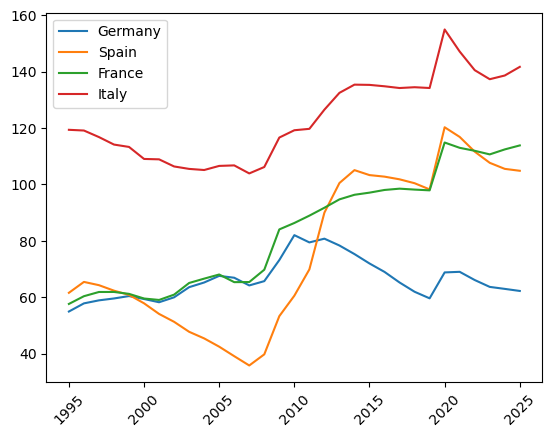

In [33]:
x = df_debt['Year']
countries = ["Germany", "Spain", "France", "Italy"]

for country in countries:
    plt.plot(x, df_debt[country], label = country)

plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [41]:
df_debt_wide.to_csv('data/df_debt_wide.csv', sep = ",", index = False)

# From wide to long

In [34]:
df_debt_long = pd.melt(
    df_debt,
    id_vars = 'Year',
    var_name = 'Country',
    value_name = 'Debt ratio'
)

In [35]:
df_debt_long

,Year,Country,Debt ratio
0,1995,Germany,54.9024
1,1996,Germany,57.7939
2,1997,Germany,58.8666
3,1998,Germany,59.5347
4,1999,Germany,60.3874
...,...,...,...
119,2021,Italy,147.1270
120,2022,Italy,140.5217
121,2023,Italy,137.3104
122,2024,Italy,138.6244


/home/sebastian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sebastian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Debt ratio'>

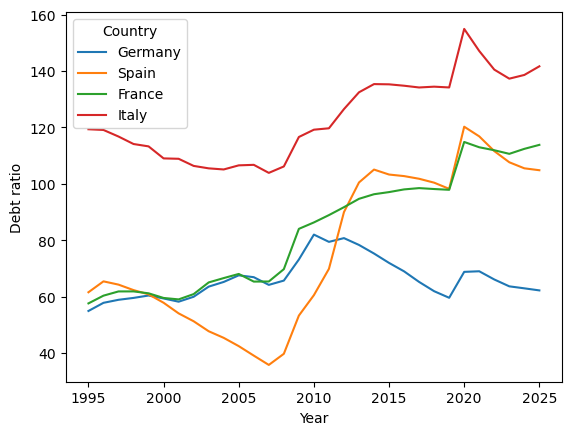

In [36]:
sns.lineplot(x = 'Year', 
             y = 'Debt ratio', 
             hue = 'Country', 
             data = df_debt_long)

# From long to wide

In [38]:
df_debt_wide = pd.pivot(
    df_debt_long,
    index = 'Year', 
    columns = 'Country', 
    values = 'Debt ratio'
).reset_index()

In [39]:
df_debt_wide.head()

Country,Year,France,Germany,Italy,Spain
0,1995,57.5929,54.9024,119.3622,61.5424
1,1996,60.3374,57.7939,119.1093,65.4076
2,1997,61.8342,58.8666,116.7821,64.2495
3,1998,61.8435,59.5347,114.1269,62.3060
4,1999,61.1666,60.3874,113.2895,60.8039


In [40]:
df_debt_long.to_csv('data/df_debt_long.csv', sep = ",", index = False)